In [1]:
import os
import shutil

# Define the path to the working directory
working_dir = '/kaggle/working'
 
# Remove all files and folders in the working directory
for filename in os.listdir(working_dir):
    file_path = os.path.join(working_dir, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)
    else:
        shutil.rmtree(file_path)

print("Cleared /kaggle/working directory.")

Cleared /kaggle/working directory.


In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extr
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

In [5]:
ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Crema = "/kaggle/input/cremad/AudioWAV/"

In [6]:
ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    # as there are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated with that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(ravdess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [7]:
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(os.path.join(Crema, file))
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
       file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [8]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [9]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file)) 
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


In [10]:
# creating Dataframe using 2 dataframes we created so far.
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
# data_path.to_csv("data_path.csv",index=False)
# data_path.head()

data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


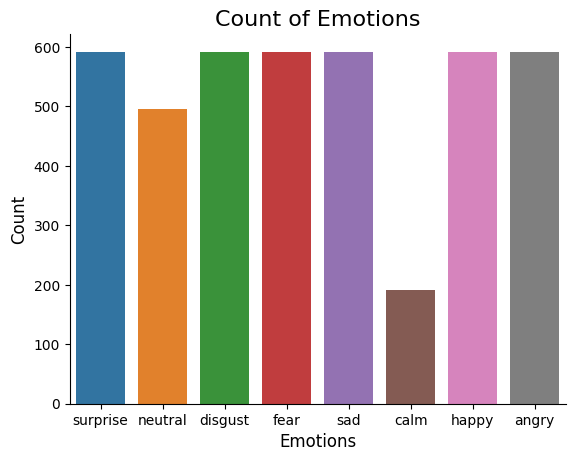

In [11]:
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [12]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with sad emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with sad emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

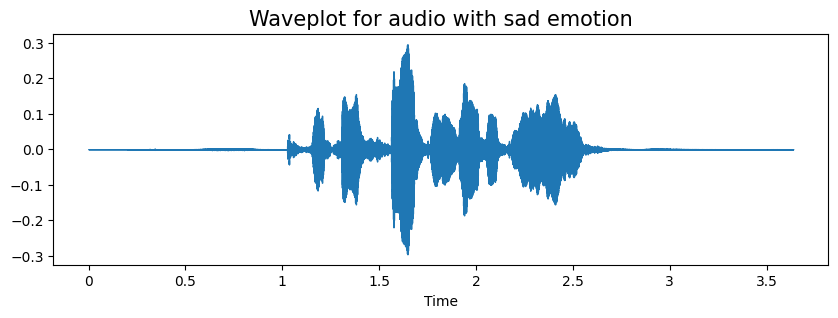

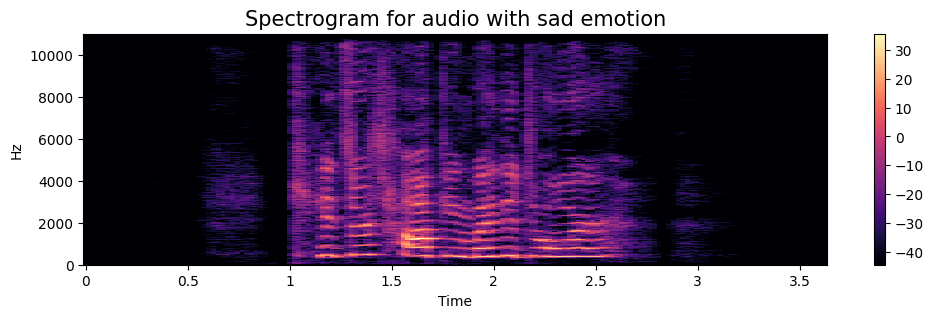

In [13]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

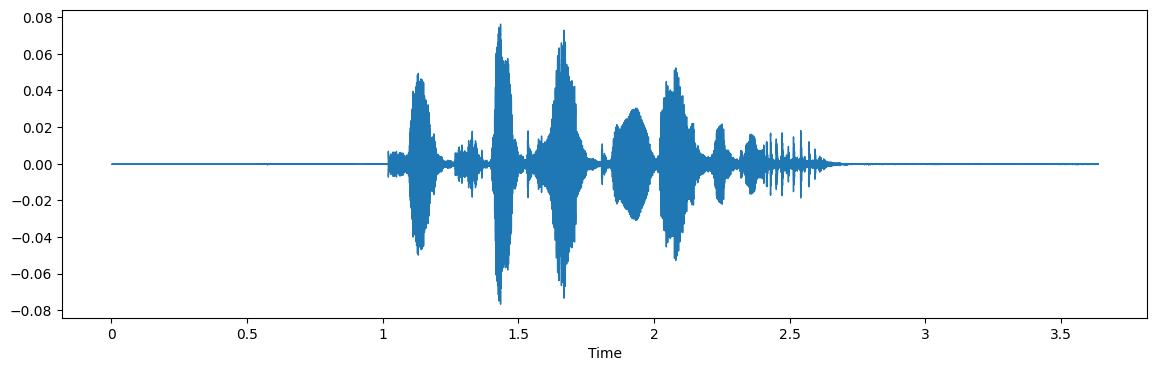

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

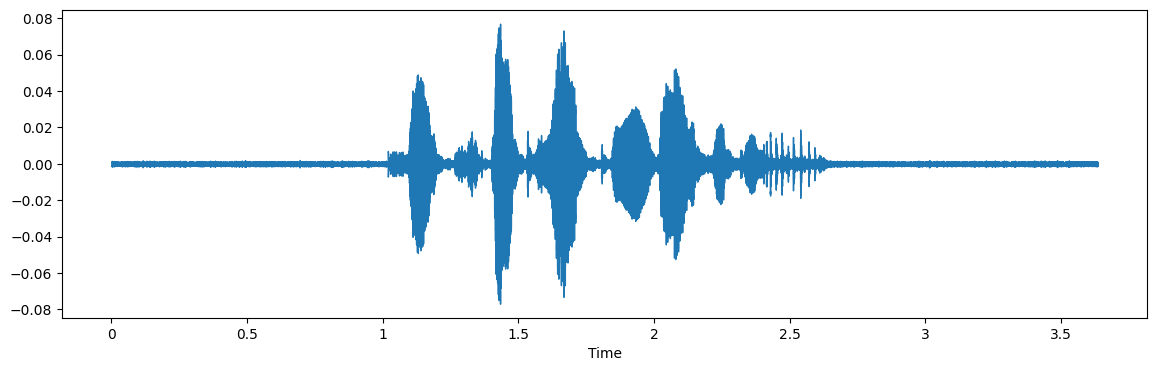

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

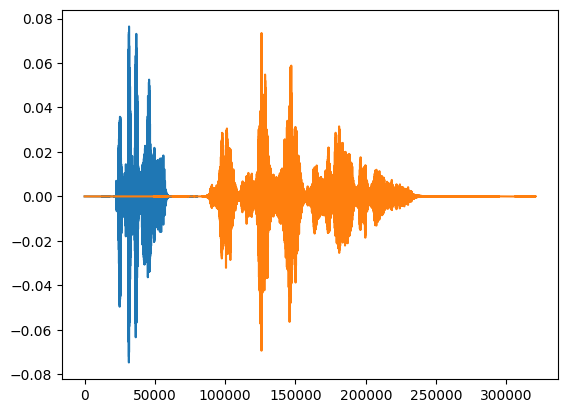

In [17]:
import numpy as np, librosa

x = data
y = librosa.effects.time_stretch(data, rate=4000/16000)
plt.plot(x) # plotted in blue
plt.plot(y)

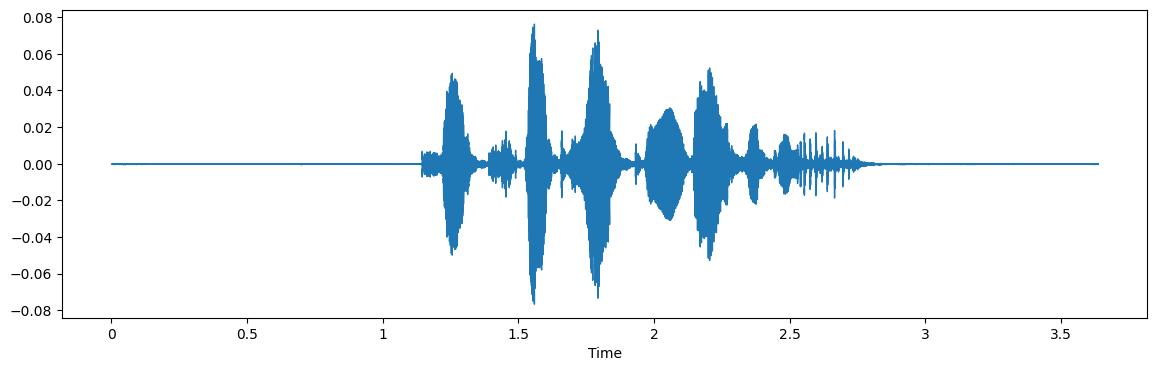

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

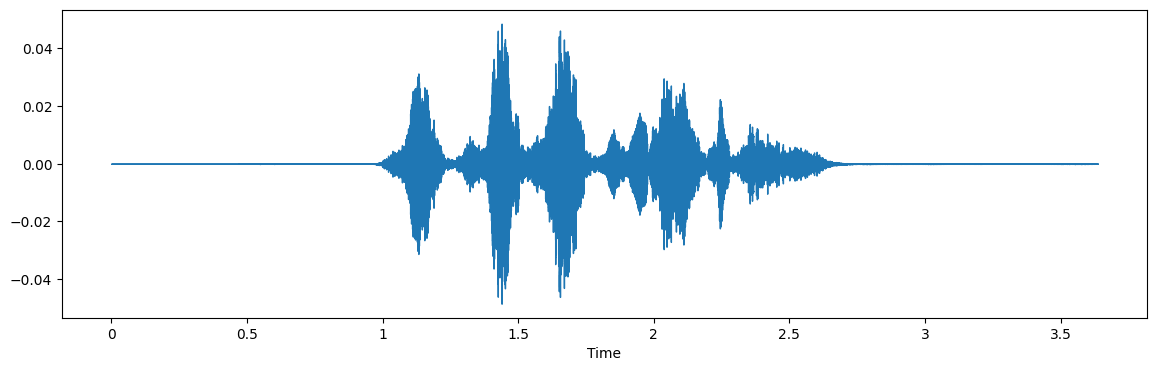

In [19]:
# Define the number of semitones to shift (positive for higher pitch, negative for
semitones = 10# Increase pitch by one octave

# Apply pitch shift
pitched_x = librosa.effects.pitch_shift(y=data, sr=sample_rate, n_steps=semitones)

# Plot and play the pitch-shifted audio
plt.figure(figsize=(14, 4))

librosa.display.waveshow(y=pitched_x, sr=sample_rate) # Use waveshow for better visualization
Audio(pitched_x, rate=sample_rate)

In [20]:
def extract_features(data, sample_rate):
    # ZCR (Zero-Crossing Rate)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    # Chroma Features
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

    # MFCC (Mel-frequency cepstral coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

    # RMS (Root Mean Square)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)

    # Return all features combined
    return np.hstack((zcr, chroma_stft, mfcc, rms, mel))

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch(data, sample_rate, n_steps=2):
    return librosa.effects.pitch_shift(data, n_steps=n_steps, sr=sample_rate)

In [21]:
X, Y = [], []

for path, emotion in zip(data_path.Path, data_path.Emotions):
    # Load audio file
    data, sample_rate = librosa.load(path, sr=None)
    
    # Extract features
    feature = extract_features(data, sample_rate)
    
    # Append features to X
    X.append(feature)
    
    # Append emotion label to Y
    Y.append(emotion)

In [22]:
X = np.array(X)
Y = np.array(Y)

# Save the features and labels separately
np.save('features.npy', X)
np.save('labels.npy', Y)

In [23]:
# Load features and labels
X = np.load('features.npy')
Y = np.load('labels.npy')

In [24]:
# Now you can use X and Y for training your models or any other task
len(X), len(Y), data_path.Path.shape

(4240, 4240, (4240,))

In [25]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.077356,0.597668,0.569676,0.552510,0.519775,0.518444,0.568923,0.603412,0.593776,0.584967,...,6.448764e-06,4.270611e-06,1.929793e-06,1.382053e-06,1.325920e-06,1.724247e-06,6.659272e-07,5.710148e-08,7.411737e-09,surprise
1,0.055098,0.563816,0.541095,0.528790,0.569641,0.562325,0.583438,0.605805,0.628712,0.625144,...,5.245981e-07,4.794794e-07,2.306867e-07,8.584893e-08,5.591993e-08,5.252700e-08,2.302577e-08,6.673671e-09,5.952105e-09,neutral
2,0.067452,0.677283,0.641305,0.614089,0.622537,0.659375,0.690025,0.701118,0.662260,0.660558,...,3.632615e-06,3.099354e-06,1.702521e-06,1.313403e-06,9.251826e-07,5.764591e-07,2.606133e-07,2.520313e-08,7.357648e-09,disgust
3,0.059311,0.530809,0.473593,0.469681,0.502935,0.530212,0.572539,0.616313,0.606503,0.600060,...,1.507578e-07,7.862435e-08,6.800079e-08,6.680273e-08,4.742554e-08,2.898010e-08,1.576516e-08,6.809927e-09,6.404414e-09,disgust
4,0.064246,0.634861,0.619065,0.652576,0.645365,0.668260,0.692250,0.706847,0.696286,0.664889,...,1.093231e-06,7.725272e-07,5.356151e-07,3.585070e-07,2.600881e-07,2.135108e-07,7.362033e-08,9.853049e-09,6.758268e-09,neutral


In [26]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [27]:
#Split features from targets
x = Features.iloc[:,:-1]
#Split targets
y = Features.iloc[:,-1]

In [28]:
x

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.077356,0.597668,0.569676,0.552510,0.519775,0.518444,0.568923,0.603412,0.593776,0.584967,...,1.227509e-05,6.448764e-06,4.270611e-06,1.929793e-06,1.382053e-06,1.325920e-06,1.724247e-06,6.659272e-07,5.710148e-08,7.411737e-09
1,0.055098,0.563816,0.541095,0.528790,0.569641,0.562325,0.583438,0.605805,0.628712,0.625144,...,8.546747e-07,5.245981e-07,4.794794e-07,2.306867e-07,8.584893e-08,5.591993e-08,5.252700e-08,2.302577e-08,6.673671e-09,5.952105e-09
2,0.067452,0.677283,0.641305,0.614089,0.622537,0.659375,0.690025,0.701118,0.662260,0.660558,...,6.247216e-06,3.632615e-06,3.099354e-06,1.702521e-06,1.313403e-06,9.251826e-07,5.764591e-07,2.606133e-07,2.520313e-08,7.357648e-09
3,0.059311,0.530809,0.473593,0.469681,0.502935,0.530212,0.572539,0.616313,0.606503,0.600060,...,1.872010e-07,1.507578e-07,7.862435e-08,6.800079e-08,6.680273e-08,4.742554e-08,2.898010e-08,1.576516e-08,6.809927e-09,6.404414e-09
4,0.064246,0.634861,0.619065,0.652576,0.645365,0.668260,0.692250,0.706847,0.696286,0.664889,...,2.377451e-06,1.093231e-06,7.725272e-07,5.356151e-07,3.585070e-07,2.600881e-07,2.135108e-07,7.362033e-08,9.853049e-09,6.758268e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.204168,0.548220,0.545763,0.532792,0.463777,0.514372,0.528550,0.519561,0.518765,0.492098,...,3.706829e-03,1.123361e-03,1.437347e-03,1.633529e-03,2.171546e-03,3.794780e-03,2.228941e-03,1.646151e-03,2.024060e-03,1.912435e-03
4236,0.230518,0.543951,0.532759,0.507977,0.465618,0.458761,0.519704,0.587890,0.527856,0.451291,...,9.089962e-03,3.936339e-03,2.715764e-03,3.214103e-03,5.513506e-03,5.824498e-03,4.550420e-03,4.460218e-03,1.052387e-02,1.142824e-02
4237,0.176545,0.494751,0.503087,0.449772,0.437564,0.489171,0.510817,0.556605,0.508730,0.520876,...,7.704215e-03,4.642792e-03,1.916507e-03,2.491269e-03,2.855616e-03,5.783758e-03,5.088021e-03,1.989852e-03,2.094709e-03,2.623571e-03
4238,0.152611,0.415756,0.435659,0.356554,0.361583,0.382358,0.406532,0.489113,0.526786,0.544821,...,5.700695e-03,1.719539e-03,3.731845e-03,4.624358e-03,4.081257e-03,5.617284e-03,5.218223e-03,3.130407e-03,3.943366e-03,3.639397e-03


In [29]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3392, 162)
y_train shape: (3392,)
X_test shape: (848, 162)
y_test shape: (848,)


In [30]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

# Encode emotion labels into numbers
y_train_lb = to_categorical(lb.fit_transform(y_train))
y_test_lb = to_categorical(lb.fit_transform(y_test))

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (3392, 162)
y_train shape: (3392, 8)
X_test shape: (848, 162)
y_test shape: (848, 8)


In [31]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(lb.classes_):
    y_labels_encoded[i] = label

y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise'}

In [32]:
#scaling
from sklearn.preprocessing import StandardScaler

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [33]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(3392, 162, 1)
(848, 162, 1)


In [34]:
#another try
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization

In [35]:
#Build sequential CNN
CNN_model = Sequential()

#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same',
                   input_shape=(162, 1), activation='relu'))

#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))

#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten
CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

In [36]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 16)        │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 162, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 162, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 162, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,717,192 (10.37 MB)

 Trainable params: 2,717,192 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

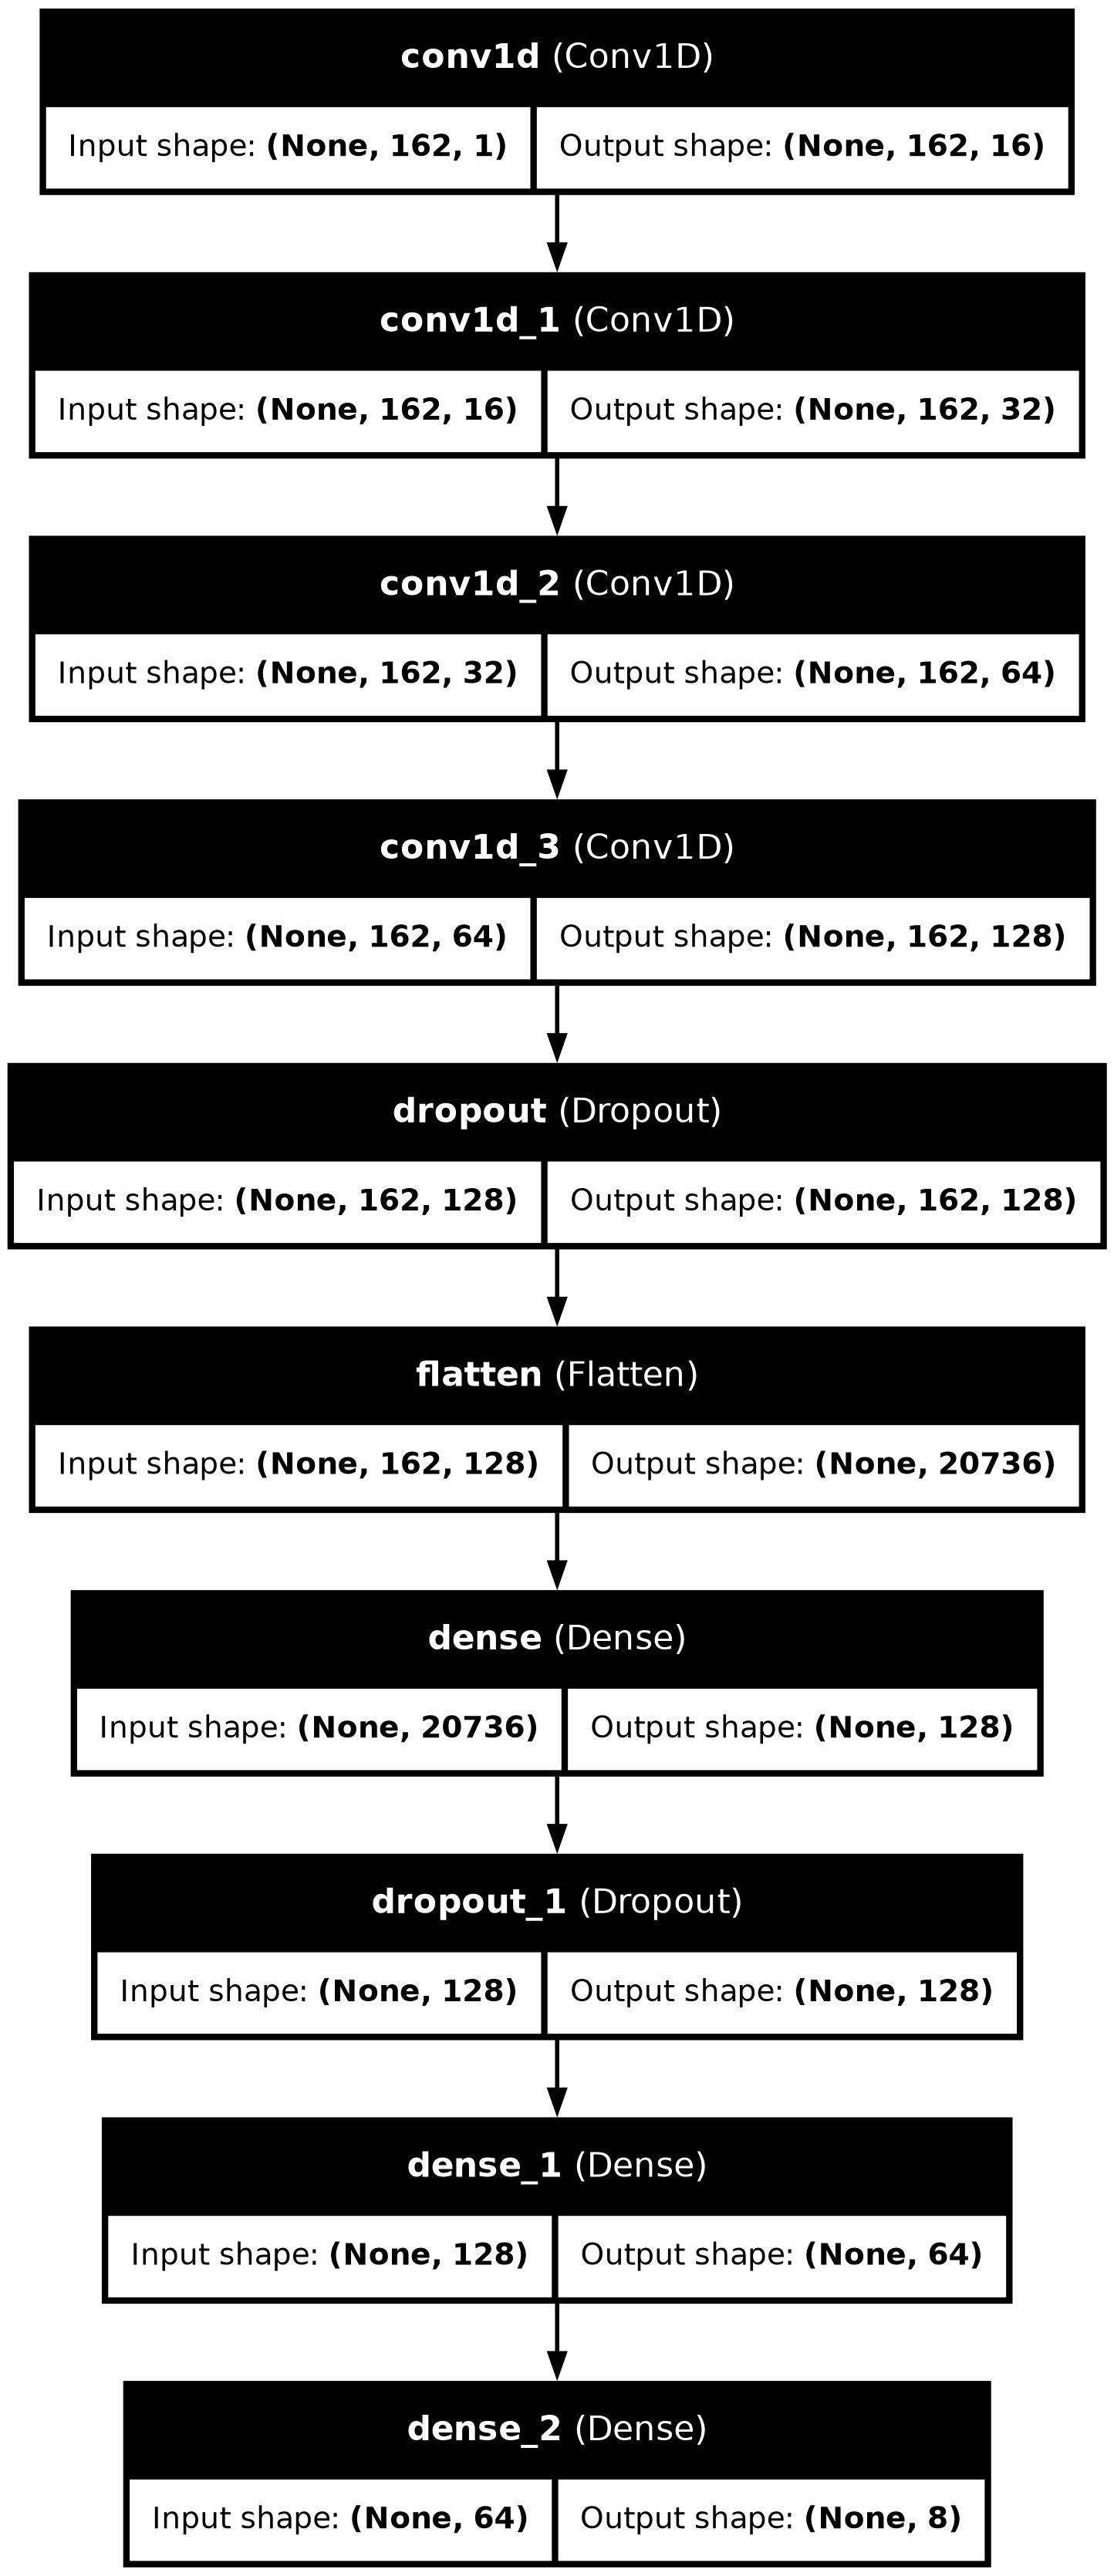

In [37]:
from keras.utils import plot_model
# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='Feed Forward NN.png', show_shapes=True,  show_layer_names=True)

In [38]:
# Compile the model with the desired loss function, optimizer, and metric to optimi
CNN_model.compile(loss = 'categorical_crossentropy',
 optimizer = 'Adam',
 metrics = ['accuracy'])

In [39]:
# from keras.callbacks import ModelCheckpoint

# checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5',
#  verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
 batch_size = 64,
 epochs = 25,
 verbose = 1,
 validation_data = (x_testcnn, y_test_lb))

Epoch 1/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4731 - loss: 1.4059 - val_accuracy: 0.7606 - val_loss: 0.6604
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7613 - loss: 0.6337 - val_accuracy: 0.7677 - val_loss: 0.6133
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7913 - loss: 0.5600 - val_accuracy: 0.8196 - val_loss: 0.5191
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8279 - loss: 0.4693 - val_accuracy: 0.8078 - val_loss: 0.5703
Epoch 5/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8279 - loss: 0.4607 - val_accuracy: 0.8290 - val_loss: 0.5235
Epoch 6/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8595 - loss: 0.3868 - val_accuracy: 0.8349 - val_loss: 0.5290
Epoch 7/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8584 - loss: 0.3769 - val_accuracy: 0.8420 - val_loss: 0.4935
Epoch 8/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8884 - loss: 0.2941 - val_accuracy: 0.8361 - v

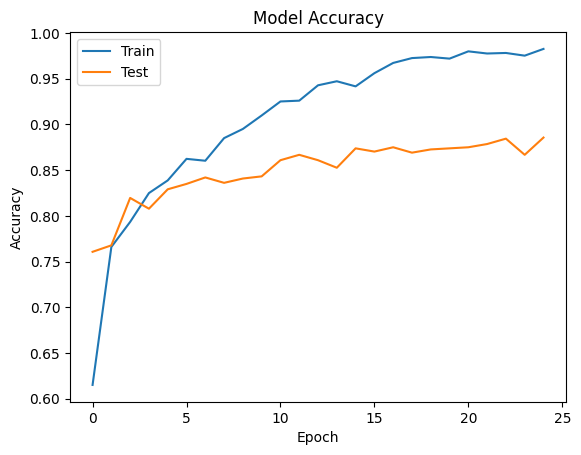

In [40]:
import matplotlib.pyplot as plt

# Plot model accuracy over epochs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
# Calculate pre-training accuracy
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8786 - loss: 0.5681
Pre-training accuracy: 88.5613%


In [42]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9973466992378235
Testing Accuracy:  0.885613203048706


In [43]:
# Predict probabilities for each class
y_pred_probs = CNN_model.predict(x_testcnn)

# Extract class labels based on maximum probability
y_test_predictions = np.argmax(y_pred_probs, axis=1)

# Print predicted class labels
print(y_test_predictions)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[0 6 4 6 4 3 5 3 6 4 5 6 6 6 0 7 3 1 6 5 7 6 4 2 4 3 1 6 4 7 3 2 5 4 0 7 6
 2 2 2 4 4 2 5 4 2 0 5 5 2 4 5 6 7 5 7 0 1 3 0 0 0 4 4 1 2 2 5 5 4 3 4 7 2
 3 0 1 0 4 5 7 3 5 0 1 7 3 3 5 6 4 5 5 6 5 4 3 3 2 1 3 6 3 7 3 2 3 7 4 1 6
 1 2 7 0 7 7 4 3 0 0 2 5 0 4 0 7 0 7 7 6 4 0 4 5 2 0 7 0 2 2 4 5 6 1 2 6 7
 2 3 3 3 6 4 7 7 5 0 7 4 7 7 7 7 5 7 2 4 4 7 0 0 5 3 0 6 6 3 2 2 0 6 2 6 0
 4 7 1 0 1 7 5 0 7 3 5 5 1 7 6 7 3 2 7 3 4 3 1 7 0 3 0 5 7 6 3 5 5 0 0 7 7
 7 4 4 3 2 6 2 4 4 1 6 0 5 4 7 6 4 1 6 2 2 0 5 6 6 6 0 2 5 4 7 6 2 7 2 6 2
 4 7 2 5 6 0 5 3 7 0 7 7 3 6 6 6 4 2 3 4 3 2 1 2 7 5 4 6 4 5 3 2 7 5 4 5 7
 5 4 6 0 5 5 7 5 6 3 3 2 6 4 3 0 7 2 2 7 2 0 6 0 5 6 7 3 7 4 3 4 4 3 2 6 3
 2 0 6 7 6 0 5 3 4 6 2 0 0 6 6 3 5 0 7 7 3 3 5 0 6 0 0 2 3 5 4 3 7 2 1 0 1
 3 6 6 2 4 0 5 6 3 5 3 5 3 5 7 1 6 3 4 0 2 3 2 4 7 7 2 5 1 3 6 5 4 3 4 7 0
 3 6 5 4 7 5 0 4 0 0 7 4 5 7 4 7 3 6 3 4 7 6 0 2 6 4 4 4 5 3 0 3 0 2 7 7 2
 0 3 3 6 7 0 0 5 7 5 6 4 5 3 7 6 2 7 5 5 6 6 1 3 5 7 1 4 3 6

In [44]:
y_test

534        angry
2751         sad
3599       happy
518          sad
3813       happy
          ...   
1649       angry
4172    surprise
2401     neutral
3475       happy
1945        fear
Name: labels, Length: 848, dtype: object

In [45]:
y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise'}

In [46]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels)
y_test_predictions_labels

array(['angry', 'sad', 'happy', 'sad', 'happy', 'fear', 'neutral', 'fear',
       'sad', 'happy', 'neutral', 'sad', 'sad', 'sad', 'angry',
       'surprise', 'fear', 'calm', 'sad', 'neutral', 'surprise', 'sad',
       'happy', 'disgust', 'happy', 'fear', 'calm', 'sad', 'happy',
       'surprise', 'fear', 'disgust', 'neutral', 'happy', 'angry',
       'surprise', 'sad', 'disgust', 'disgust', 'disgust', 'happy',
       'happy', 'disgust', 'neutral', 'happy', 'disgust', 'angry',
       'neutral', 'neutral', 'disgust', 'happy', 'neutral', 'sad',
       'surprise', 'neutral', 'surprise', 'angry', 'calm', 'fear',
       'angry', 'angry', 'angry', 'happy', 'happy', 'calm', 'disgust',
       'disgust', 'neutral', 'neutral', 'happy', 'fear', 'happy',
       'surprise', 'disgust', 'fear', 'angry', 'calm', 'angry', 'happy',
       'neutral', 'surprise', 'fear', 'neutral', 'angry', 'calm',
       'surprise', 'fear', 'fear', 'neutral', 'sad', 'happy', 'neutral',
       'neutral', 'sad', 'neutral', 

In [47]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[108,   0,   2,   1,   4,   1,   1,   2],
       [  0,  30,   2,   1,   1,   5,   3,   1],
       [  1,   1,  92,   5,   1,   1,   0,   3],
       [  2,   0,   0,  97,   1,   0,   4,   2],
       [  3,   0,   5,   6, 105,   0,   2,   0],
       [  0,   2,   1,   0,   1,  87,   1,   0],
       [  0,   4,   2,   5,   0,   5, 119,   1],
       [  1,   0,   3,   1,   4,   5,   0, 113]])

In [48]:
#See confusion matrix shape
confusion_matrix.shape

(8, 8)

In [49]:
#Turn al correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[0, 0, 2, 1, 4, 1, 1, 2],
       [0, 0, 2, 1, 1, 5, 3, 1],
       [1, 1, 0, 5, 1, 1, 0, 3],
       [2, 0, 0, 0, 1, 0, 4, 2],
       [3, 0, 5, 6, 0, 0, 2, 0],
       [0, 2, 1, 0, 1, 0, 1, 0],
       [0, 4, 2, 5, 0, 5, 0, 1],
       [1, 0, 3, 1, 4, 5, 0, 0]])

In [50]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")
#Print confusion matrix results
confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,angry,calm,disgust,fear,happy,neutral,sad,surprise
angry,0,0,2,1,4,1,1,2
calm,0,0,2,1,1,5,3,1
disgust,1,1,0,5,1,1,0,3
fear,2,0,0,0,1,0,4,2
happy,3,0,5,6,0,0,2,0
neutral,0,2,1,0,1,0,1,0
sad,0,4,2,5,0,5,0,1
surprise,1,0,3,1,4,5,0,0


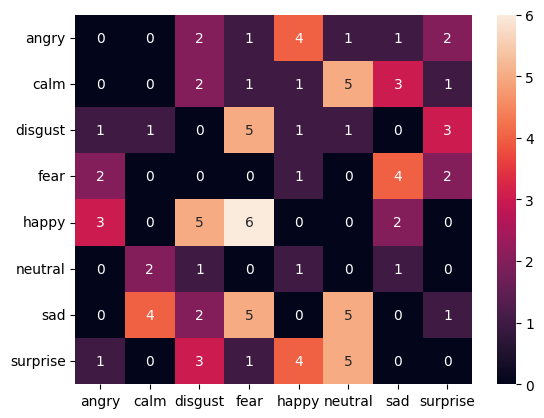

In [51]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)

In [52]:
from keras.models import model_from_json

# serialize model to json
json_model = CNN_model.to_json()

#save the model architecture to JSON file
with open('Emotion.json', 'w') as json_file:
    json_file.write(json_model)
    
#saving the weights of the model
CNN_model.save_weights('Final_Model.weights.h5')

#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


In [53]:
# Select one unit of data from x_testcnn
test_data_unit = x_testcnn[0:1]

# Make predictions
predictions = CNN_model.predict(test_data_unit)

# Get the index of the maximum prediction
predicted_class_index = np.argmax(predictions)

# Map the index to the emotion label using the label encoder
predicted_emotion = lb.inverse_transform([predicted_class_index])[0]

# Print the predicted emotion
print("Predicted Emotion:", predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Emotion: angry


In [54]:
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json

# Load the model architecture from the JSON file
with open('Emotion.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Load the model from the JSON architecture
loaded_model = model_from_json(loaded_model_json)

# Load the model weights from the HDF5 file
loaded_model.load_weights('Final_Model.weights.h5')

# Function to preprocess audio data
def preprocess_audio(audio_file_path):
    # Load the audio file
    data, sample_rate = librosa.load(audio_file_path, sr=22050)

    # Extract features (assuming extract_features is a custom function defined elsewhere)
    features = extract_features(data, sample_rate)

    # Add dimension for CNN (assuming the model expects a 4D input)
    processed_data = np.expand_dims(features, axis=0)

    return processed_data

# Function to encode emotion labels
def encode_label(emotion):
    label_encoder = LabelEncoder() 
    encoded_label = label_encoder.fit_transform([emotion])
    return encoded_label

# Preprocess the audio data
audio_file_path = ravdess + "Actor_10/03-01-01-01-01-01-10.wav"

processed_data = preprocess_audio(audio_file_path)

# Encode the emotion label
emotion = 'happy'  # Replace with the actual emotion label
encoded_label = encode_label(emotion)

# Make predictions using the loaded model
predictions = loaded_model.predict(processed_data)

# Get the index of the maximum prediction
predicted_class_index = np.argmax(predictions)

# Map the index to the emotion label using the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad'])  # Fit the encoder with emotion labels
predicted_emotion = label_encoder.inverse_transform([predicted_class_index])[0]

# Print the predicted emotion
print("Predicted Emotion:", predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted Emotion: sad


In [55]:
#first try ignore
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [56]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3180, 162), (3180, 8), (1060, 162), (1060, 8))

In [57]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3180, 162), (3180, 8), (1060, 162), (1060, 8))

In [58]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3180, 162, 1), (3180, 8), (1060, 162, 1), (1060, 8))

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
                 
model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model with increased complexity
model1 = Sequential([
 Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)),
 MaxPooling1D(pool_size=2, strides=2),
 Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'), 
 MaxPooling1D(pool_size=2, strides=2),
 Flatten(),
 Dense(512, activation='relu'),
 Dropout(0.5), # Add dropout layer with dropout rate of 0.5
 Dense(128, activation='relu'),
 Dense(8, activation='softmax') # Ensure output layer matches number of classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model with GPU support
with tf.device('/GPU:0'):
    history1 = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.2149 - loss: 1.9477 - val_accuracy: 0.4491 - val_loss: 1.5678 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.4213 - loss: 1.5755 - val_accuracy: 0.5896 - val_loss: 1.1718 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.5261 - loss: 1.2418 - val_accuracy: 0.6434 - val_loss: 1.0417 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.5862 - loss: 1.0688 - val_accuracy: 0.6792 - val_loss: 0.9599 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.6326 - loss: 0.9850 - val_accuracy: 0.7009 - val_loss: 0.7932 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.6524 - loss: 0.8905 - val_accuracy: 0.6868 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.6758 - loss: 0.

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8100 - loss: 0.5933
Accuracy of our model on test data : 79.25%


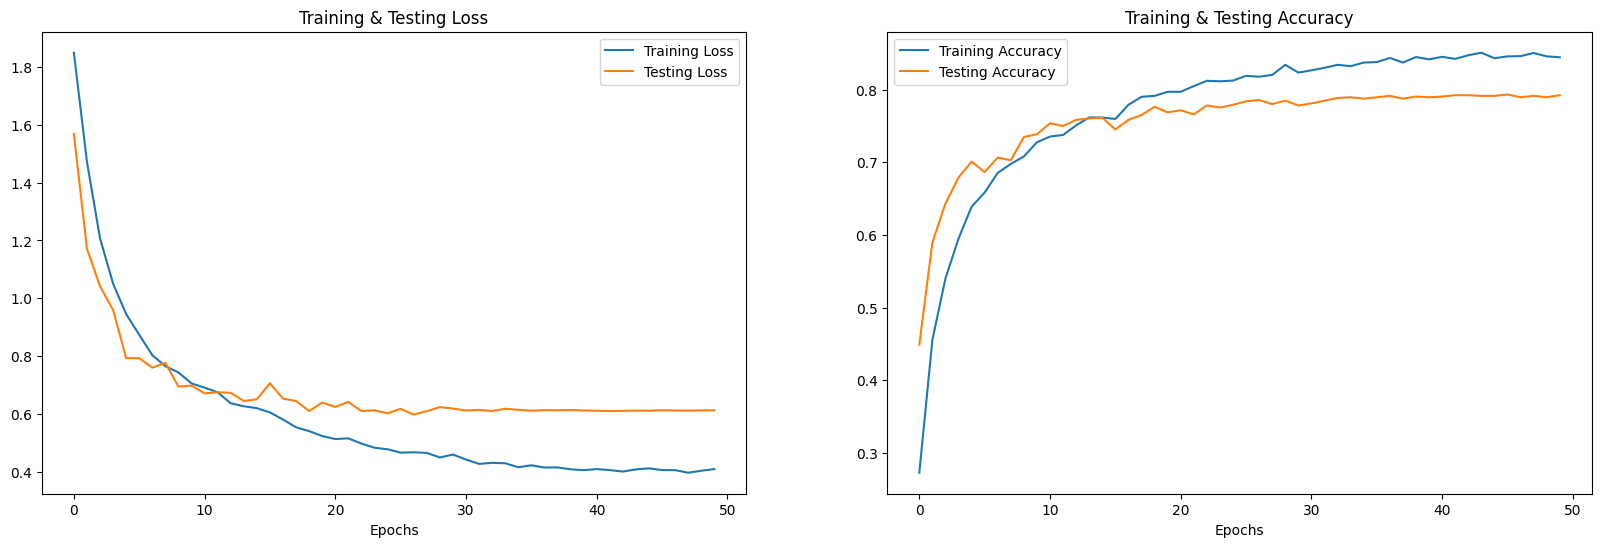

In [61]:
print(f'Accuracy of our model on test data : {model.evaluate(x_test,y_test)[1] * 100:.2f}%')

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
test_acc = history1.history['val_accuracy']
test_loss = history1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()